In [11]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/stock.csv')
data_df

,date,open
0,2013/2/8,15.07
1,2013/2/11,14.89
2,2013/2/12,14.45
3,2013/2/13,14.30
4,2013/2/14,14.94
...,...,...
1254,2018/2/1,54.00
1255,2018/2/2,53.49
1256,2018/2/5,51.99
1257,2018/2/6,49.32


Text(0, 0.5, 'Price')

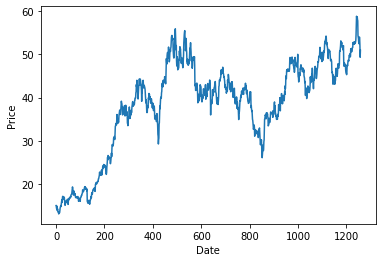

In [4]:
data_df['open'].plot()
plt.xlabel('Date')
plt.ylabel('Price')

In [5]:
from sklearn.preprocessing import MinMaxScaler
data_rehsape = data_df['open'].values.reshape(-1,1).astype('float32')

Scale the data

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(data_rehsape)

In [6]:
look_back = 3
test_size = 250
train, test = training_set_scaled[:-test_size], training_set_scaled[-test_size-look_back:] 

In [27]:
# how many days to be the base of predictions
prediction_days = 10

x_train=[]
y_train=[]

for i in range(prediction_days, len(train)):
    x_train.append(train[i-prediction_days:i,0])
    y_train.append(train[i,0])
    if i<=prediction_days:
        print(x_train)
        print(y_train)
        print()

#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

[array([0.0422782 , 0.03833514, 0.0286966 , 0.02541074, 0.03943044,
       0.01730558, 0.02606788, 0.02256298, 0.01051477, 0.00941947],
      dtype=float32)]
[0.010076672]

(999, 10, 1)


Train shape: (1009, 1)


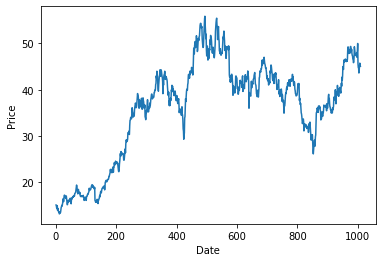

In [24]:
len_train = np.linspace(0, train.shape[0],train.shape[0]+1)
plt.plot(len_train[1:],sc.inverse_transform(train.reshape(-1,1)))
#plt.plot(len_test[1:],sc.inverse_transform(y_hat))
plt.xlabel('Date') # set a xlabel
plt.ylabel('Price')

print('Train shape:', train.shape)

Test shape: (253, 1)


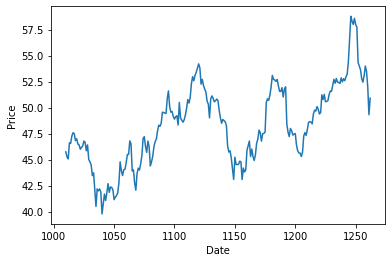

In [23]:
len_test = np.linspace(train.shape[0], test.shape[0]+train.shape[0],test.shape[0]+1)
plt.plot(len_test[1:],sc.inverse_transform(test.reshape(-1,1)))
#plt.plot(len_test[1:],sc.inverse_transform(y_hat))
plt.xlabel('Date') # set a xlabel
plt.ylabel('Price')

print('Test shape:', test.shape)

In [28]:
def LSTM_model():
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(units=1))
    
    return model

In [29]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
history_ltsm = model.fit(x_train, y_train, epochs=30, batch_size=60, validation_split=0.2)

Epoch 1/30
14/14 [==============================] - 6s 129ms/step - loss: 0.1023 - val_loss: 0.0271
Epoch 2/30
14/14 [==============================] - 0s 22ms/step - loss: 0.0146 - val_loss: 0.0079
Epoch 3/30
14/14 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 0.0023
Epoch 4/30
14/14 [==============================] - 0s 20ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 5/30
14/14 [==============================] - 0s 27ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 6/30
14/14 [==============================] - 0s 30ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 7/30
14/14 [==============================] - 0s 32ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 8/30
14/14 [==============================] - 0s 29ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 9/30
14/14 [==============================] - 0s 32ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/30
14/14 [==============================] - 0s 33ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 11

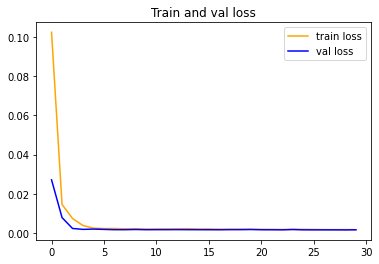

In [31]:
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, color='orange', label='train loss')
plt.plot(epochs, val_loss, color='blue', label='val loss')
plt.title('Train and val loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

Create test dataset

In [ ]:
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [34]:
# how many days to be the base of predictions
prediction_days = 10

x_test=[]
y_test=[]

for i in range(prediction_days, len(test)):
    x_test.append(test[i-prediction_days:i,0])
    y_test.append(test[i,0])
    if i<=prediction_days:
        print(x_test)
        print(y_test)
        print()

#convert into numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

#Reshape the data into 3 dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

[array([0.7143483 , 0.70361435, 0.6994523 , 0.7334063 , 0.732092  ,
       0.74742603, 0.754655  , 0.7526834 , 0.7380066 , 0.74194956],
      dtype=float32)]
[0.7307776]

(243, 10, 1)


In [43]:
y_test = np.reshape(y_test, (y_test.shape[0], 1))
y_test = sc.inverse_transform(y_test)

In [44]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

8/8 [==============================] - 0s 5ms/step


In [45]:
print(y_test)

[[46.5     ]
 [46.42    ]
 [46.      ]
 [46.18    ]
 [46.32    ]
 [46.79    ]
 [46.67    ]
 [45.85    ]
 [46.410004]
 [45.02    ]
 [44.79    ]
 [44.5     ]
 [43.46    ]
 [43.73    ]
 [42.06    ]
 [40.5     ]
 [42.18    ]
 [42.      ]
 [42.18    ]
 [41.88    ]
 [39.78    ]
 [40.7     ]
 [41.69    ]
 [41.07    ]
 [41.83    ]
 [42.69    ]
 [41.85    ]
 [42.37    ]
 [42.33    ]
 [42.09    ]
 [41.15    ]
 [41.4     ]
 [41.53    ]
 [41.81    ]
 [42.78    ]
 [44.79    ]
 [43.95    ]
 [43.47    ]
 [44.03    ]
 [44.07    ]
 [44.71    ]
 [45.5     ]
 [45.5     ]
 [46.800003]
 [46.51    ]
 [43.91    ]
 [44.02    ]
 [42.76    ]
 [42.06    ]
 [43.67    ]
 [44.18    ]
 [44.      ]
 [44.6     ]
 [45.4     ]
 [47.03    ]
 [47.21    ]
 [46.259995]
 [45.7     ]
 [46.79    ]
 [46.25    ]
 [44.4     ]
 [44.8     ]
 [45.33    ]
 [46.269997]
 [46.739998]
 [46.99    ]
 [47.789997]
 [48.320004]
 [48.2     ]
 [48.499996]
 [49.559998]
 [49.53    ]
 [49.47    ]
 [49.44    ]
 [50.86    ]
 [51.610004]
 [50.1     ]

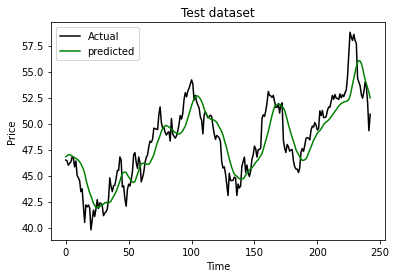

In [48]:
plt.plot(y_test, color='black', label="Actual")
plt.plot(y_pred, color= 'green', label="predicted")
plt.title("Test dataset")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.savefig('Test dataset')
plt.show()